In [45]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import random

In [46]:
df = pd.read_excel("Item103478.xlsx")
df['CREATION DATE'].min(), df['CREATION DATE'].max()

('2015-03-25', '2019-08-19')

In [47]:
cols = ['CUSTOMER NAME',          
'SHIP TO',         
'DEST ORG',          
'SALES ORDER TYPE',
'VENDOR_NAME',       
'PO #',              
'SO #',              
'CUSTOMER PO',       
'REQ #',             
'PO STATUS',         
'PO LINE',           
'Product GBU',       
'ORDERED ITEM',      
'ITEM #',            
'SUPPLIER_ITEM',     
'ITEM DESCRIPTION',    
'RETD',              
'NEED BY DATE',
'POD',               
'POA',               
'TRANSIT DAYS',      
'APPR STATUS',       
'CURR',                        
'PO UOM',            
'QTY ORDERED',       
'QTY CANCELLED',     
'QTY PO BALANCE',    
'PROMISED DATE',     
'CETD',              
'ATD',               
'BOL #',             
'CONTAINER #',       
'LOT_NUM',           
'SHIP LINE STATUS']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('CREATION DATE')
df.isnull().sum()

CREATION DATE            0
PromisedDays             3
PRICE                    0
ER / ISP SHIPMENT #    650
ER/SHIPPED QTY           0
dtype: int64

In [48]:
cols=['PRICE','ER / ISP SHIPMENT #','ER/SHIPPED QTY']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('CREATION DATE')
df.isnull().sum()

CREATION DATE    0
PromisedDays     3
dtype: int64

In [49]:
df.fillna(df.mean(), inplace=True)

In [50]:
df.dtypes

CREATION DATE     object
PromisedDays     float64
dtype: object

In [51]:
df['CREATION DATE'] = pd.to_datetime(df['CREATION DATE'])

In [52]:
df.dtypes

CREATION DATE    datetime64[ns]
PromisedDays            float64
dtype: object

In [53]:
df = df.set_index('CREATION DATE')
df.index

DatetimeIndex(['2015-03-25', '2015-03-25', '2015-03-25', '2015-04-02',
               '2015-04-02', '2015-04-07', '2015-04-09', '2015-04-09',
               '2015-04-09', '2015-04-09',
               ...
               '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17',
               '2019-07-17', '2019-08-07', '2019-08-07', '2019-08-07',
               '2019-08-18', '2019-08-19'],
              dtype='datetime64[ns]', name='CREATION DATE', length=661, freq=None)

In [65]:
y = df['PromisedDays'].resample('M').mean()

In [66]:
y['2017':]

CREATION DATE
2017-01-31     86.823529
2017-02-28     97.625000
2017-03-31    125.692308
2017-04-30    118.250000
2017-05-31    106.916667
2017-06-30    105.000000
2017-07-31     93.000000
2017-08-31     91.125000
2017-09-30     92.333333
2017-10-31     94.923077
2017-11-30     93.888889
2017-12-31     83.153846
2018-01-31     99.423077
2018-02-28    108.714286
2018-03-31    116.181818
2018-04-30    121.500000
2018-05-31     78.692308
2018-06-30     81.142857
2018-07-31     91.500000
2018-08-31     78.200000
2018-09-30     94.642857
2018-10-31     99.285714
2018-11-30    106.333333
2018-12-31    112.416667
2019-01-31    135.235294
2019-02-28    100.666667
2019-03-31    157.956522
2019-04-30    150.090909
2019-05-31    154.888889
2019-06-30    109.578947
2019-07-31    116.416667
2019-08-31    102.619757
Freq: M, Name: PromisedDays, dtype: float64

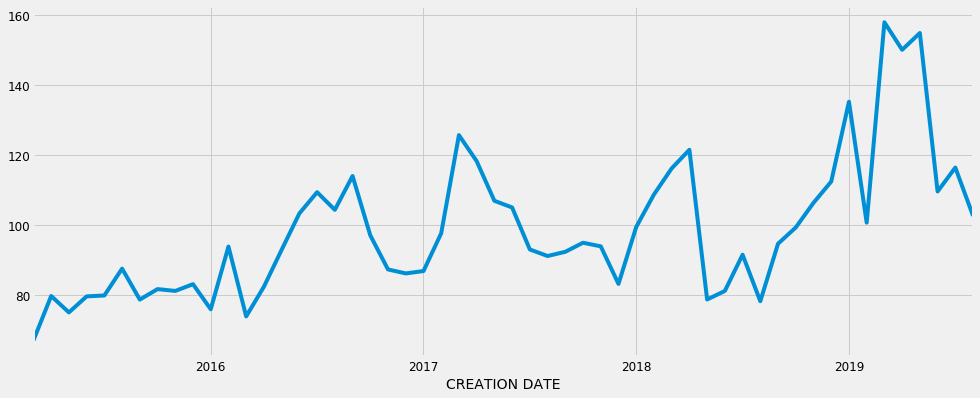

In [67]:
y.plot(figsize=(15, 6))
plt.show()

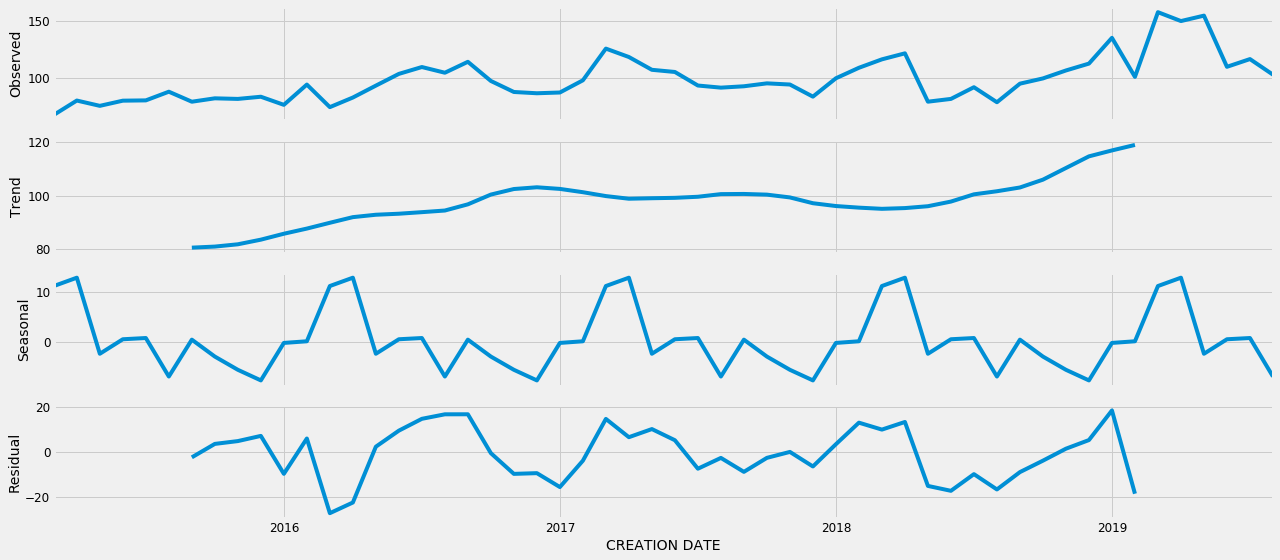

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [58]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:641.604350153406
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:477.72118483219526
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:378.83439783876054
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1269.7341477546381
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:381.1049868382195
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:366.42856908845
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:281.18237341597234
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1074.9813027347584
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:575.6745996857833
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:433.394319910186
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:362.4795112362168
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1121.5995851641433
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:375.90141021272063
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:354.85705253748284
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:274.8908129142072
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1209.7406376308381
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:438.5331992370338
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:346.8880471722923
ARIMA

In [60]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7086      0.373     -1.899      0.058      -1.440       0.023
ma.L1          0.4103      0.507      0.810      0.418      -0.583       1.403
ar.S.L12      -0.5231      0.210     -2.490      0.013      -0.935      -0.111
sigma2       322.2820    117.814      2.736      0.006      91.371     553.193


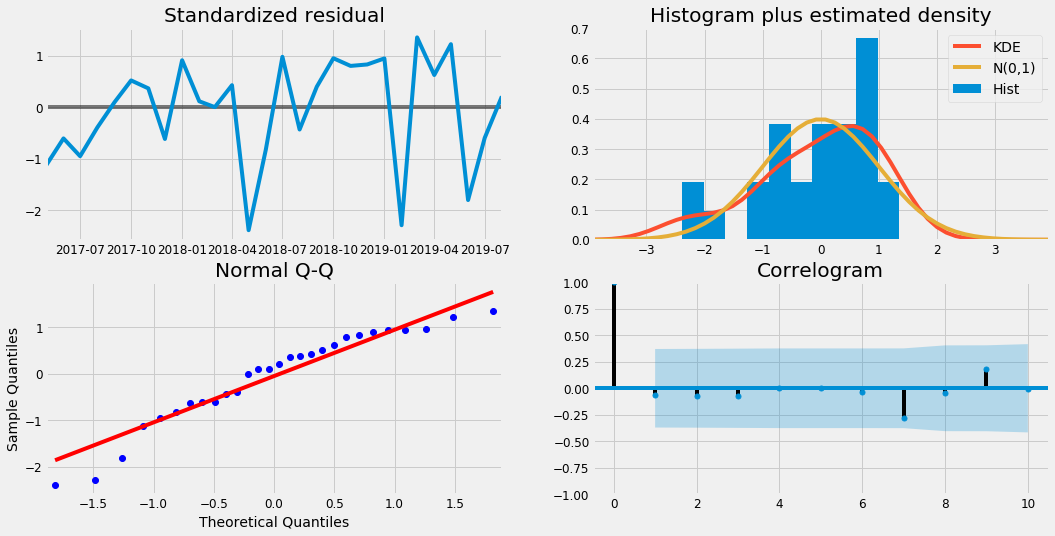

In [68]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

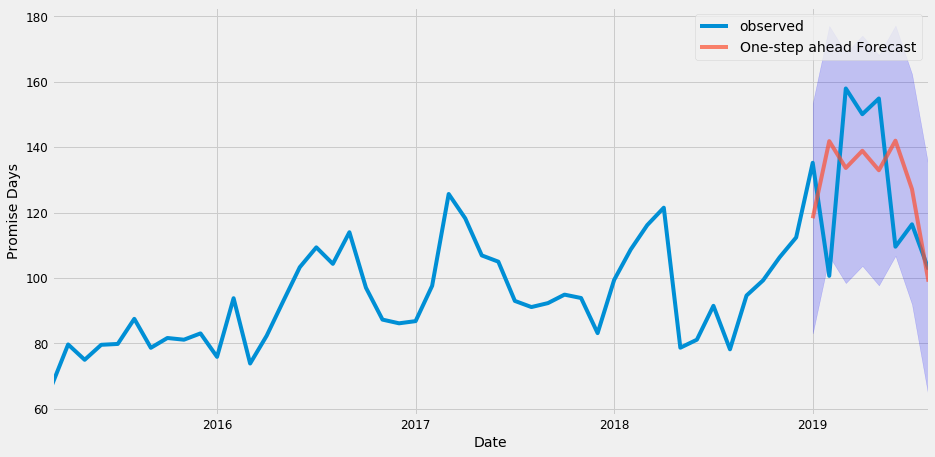

In [69]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='B', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Promise Days')
plt.legend()
plt.show()

In [70]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


In [71]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is nan


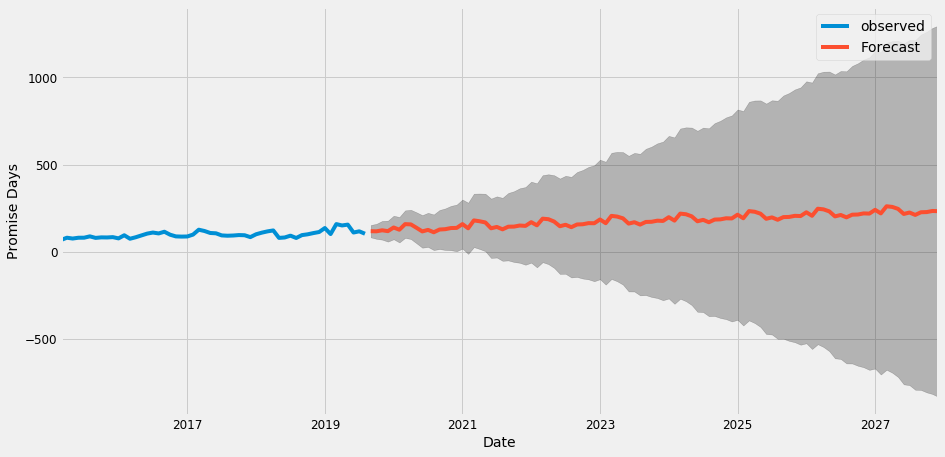

In [72]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Promise Days')
plt.legend()
plt.show()